![](http://)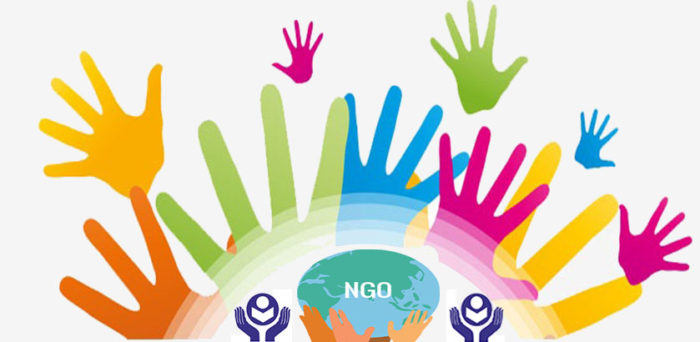

# <font color=purple>Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# <font color=purple> Import necessary libraries</font>

In [ ]:
# import all libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta


# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree



# <font color=purple>1. Reading and Inspection</font>

In [ ]:
# Read the given CSV file, and view some sample records
df= pd.read_csv('../input/pca-kmeans-hierarchical-clustering/Country-data.csv')
df.head()

In [ ]:
# Reading the data dictionary file

data_dict = pd.read_csv('../input/pca-kmeans-hierarchical-clustering/data-dictionary.csv')
data_dict.head(10)

In [ ]:
#Determine the number of rows and columns
df.shape

In [ ]:
#Checking the datatypes
df.info()

In [ ]:
#summary of all the numeric columns in the dataset
df.describe()

# <font color=purple>2. Cleaning the data</font>

- ### <font color=blue>Checking missing values</font>

In [ ]:
print('Total missing values in the data')
print('-'*50)
print(df.isnull().sum())


### <font color=green>We can see that there are no missing values in the data </font>

#### <font color=purple>Convert % columns to actual values </font>

In [ ]:
# Converting exports,imports and health spending percentages to absolute values.

df['exports'] =df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [ ]:
df.head()

# <font color=purple>3. Data Visualization</font>

- ### <font color=blue>Heatmap

In [ ]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
sns.heatmap(df.corr(),annot = True,cmap='RdYlGn')

plt.show()

- #### <font color=green>Child mortality is highly correlated with total fertility with the correlation coefficient of 0.85</font>
- #### <font color=green>Imports & exports, health & gdpp, income & gdpp are also well correlated</font>
- #### <font color=green>Life expectency has strong negative correlation with total fertility of about -0.76</font>
- #### <font color=green>Child mortality is also in strong negative correlation with life expectency</font>

- ### <font color=blue>Income vs Child Mortality

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='income',y='child_mort', data=df)
plt.title('Income vs Child mortality',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='income',y='child_mort',hue='total_fer', data=df, palette='gist_rainbow')
plt.title('Income vs Child mortality & total Fertility',fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.show()

- #### <font color=green> From the plots above We can see that low income people have high child mortality, which means death of children under age 5 is more, where there is a low income </font>
- #### <font color=green> Where the income is more we can see there is no mortality
- #### <font color=green> In the second plot we can see that, high fertility rate for a woman and low income have high child mortality


- ### <font color=blue>Pairplot

In [ ]:
sns.pairplot(df, vars=["child_mort", 'total_fer','gdpp','life_expec','income', 'imports', 'exports'], kind='scatter')
plt.show()

- #### <font color=green>From the pairplot above we can make out how different variables are correlated to each other

- ## <font color=blue> Country vs Child Mortality

In [ ]:
Country= df.groupby('country').child_mort.sum().sort_values(ascending=False)
Country=pd.DataFrame(Country)
Country1=Country.head()
Country2=Country.tail()
display(Country1.head())  
print('*'*50)
display(Country2.tail())


In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Country1.index, Country1.child_mort, palette='husl')
plt.title('Countries having high child mortality ',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(Country2.index, Country2.child_mort, palette='cool')
plt.title('Countries having low  Child Mortality',fontweight="bold", size=20)
plt.show()

- ### <font color=green> Haiti is a country with highest child mortality of around 208 out of 1000 live births. Next comes Sierra Leone 
- ### <font color=green> Iceland and Luxembourg are the countries with less child mortality   

- ## <font color=blue> Country vs Income

In [ ]:
Income= df.groupby('country').income.sum().sort_values(ascending=False)
Income=pd.DataFrame(Income)
Income1=Income.head()
Income2=Income.tail()
display(Income1)
print('*'* 50)
display(Income2)

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Income1.index, Income1.income, palette='cool')
plt.title('Countries with high Income',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(Income2.index, Income2.income, palette='magma')
plt.title('Countries with low Income',fontweight="bold", size=20)
plt.show()

- ### <font color=green> Net income per person is more in Qatar which is 125000
- ### <font color=green> Congo, Democratic Republic and Liberia has less income  

 - ## <font color=blue>Country vs GDP

In [ ]:
GDP= df.groupby('country').gdpp.sum().sort_values(ascending=False)
GDP=pd.DataFrame(GDP)
GDP1=GDP.head()
GDP2=GDP.tail()
display(GDP1)
print('*'* 50)
display(GDP2)

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(GDP1.index, GDP1.gdpp, palette='rocket')
plt.title('Countries with high GDP',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(GDP2.index, GDP2.gdpp, palette='rocket_r')
plt.title('Countries with low GDP',fontweight="bold", size=20)
plt.show()

- ### <font color=green>We can see that Luxembourg has high GDP per capita which is around 105000. Then next comess Norway 
- ### <font color=green>Burundi has very less GDP per capita     

- ## <font color=blue>Country vs Imports

In [ ]:
plt.figure(figsize=(8, 6))
Imports=df.groupby('country').imports.sum().sort_values(ascending=False)
Imports= pd.DataFrame(Imports)
Imports1=Imports.head()
sns.barplot(Imports1.index,Imports1.imports, palette='twilight')
plt.title('Countries with high imports of goods and services',fontweight="bold", size=20)
plt.show()
display(Imports1)
Imports2=Imports.tail(2)
display(Imports2)


- ### <font color=green>We can see that Luxembourg has most imports of goods and services of about 149100 per capita
- ### <font color=green>Myanmar has very less import of goods and servicesof about 0.6511 per capita   

- ## <font color=blue>Life Expectancy

In [ ]:
Life_Ex= df.sort_values(by=['life_expec'],ascending=True)
Life_Ex.head()


In [ ]:
Life_ex=df.sort_values(by=['life_expec'],ascending=False)
display(Life_ex[0:5])

- ### <font color=green> We can see that Life expectancy is less in Haiti, which means new born child will survive for less number of years
- ### <font color=green>We already saw above that child mortality is also more in Haiti    
- ### <font color=green> Japan has highest life expectancy  

- ## <font color=blue>Exports

In [ ]:
Exports=df.sort_values(by=['exports'], ascending= False)
display(Exports[0:5])

In [ ]:
Export=df.sort_values(by=['exports'], ascending= True)
display(Export[0:5])

In [ ]:
plt.figure(figsize=(8, 5))
df.groupby('country').exports.sum().sort_values(ascending=False).head().plot.bar(color='salmon',hatch="//",edgecolor='k')
plt.ylabel('Exports')
plt.title('Countries with more Exports',fontweight="bold", size=20)
plt.show()


- ### <font color=green>Luxembourg has more export of goods and services of around 183750, due to which that country has the highest GDP per capita
- ### <font color=green>Myanmar is the country with least exports and next to it is Burundi. Even Imports were less for these countries.     
    

- ### <font color=blue>Health

In [ ]:
Health=df.sort_values(by=['health'], ascending= True)
Health[0:5]

In [ ]:
Health1=df.sort_values(by=['health'], ascending= False)
Health1[0:5]

In [ ]:
plt.figure(figsize=(15, 6))
He=df.groupby('country').health.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
He1=He.head(10).plot.bar(color='mediumorchid',hatch=".")
plt.title('Countries with high total health spending',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
He2=He.tail(10).plot.bar(color= 'skyblue',hatch='.')
plt.title('Countries with low total health spending',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()



- ### <font color=green>United States spends more per person on health than comparable countries which is 8663.
- ### <font color=green>Eritrea spends less on health

- ### <font color=blue> Total Fertility

In [ ]:
Fertility=df.sort_values(by=['total_fer'], ascending= True).head()
Fertility

In [ ]:
Fertility1=df.sort_values(by=['total_fer'], ascending=False).head()
Fertility1

In [ ]:
df.total_fer.max()

In [ ]:
df.life_expec.max()

In [ ]:
plt.figure(figsize=(20, 6))
Fe=df.groupby('country').total_fer.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
Fe1=Fe.head(6).plot.bar(color='mediumseagreen',hatch="/")
plt.title('Countries with high total Fertility',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
Fe2=Fe.tail(6).plot.bar(color= 'orchid',hatch='.')
plt.title('Countries with low total Fertility',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()



### <font color=green> Less number of children born to each woman,can survive more, As we see Singapore, South Korea have more life expectancy and less total fertility. 
### <font color=green> Chad, Mali and Congo Dem Republic have very high fertility and child morality    

## <font color=blue>Inflation

In [ ]:
In=df.sort_values(by=['inflation'], ascending=False).head()
In

In [ ]:
In=df.sort_values(by=['inflation'], ascending=True).head()
In

### <font color=green>Nigeria is having high inflation rate where as Japan,Ireland has very less Inflation rates

### <font color=blue>Distplot

In [ ]:
plt.figure(figsize = (20,16))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]], color='crimson')
    plt.subplots_adjust(right=1.1)
    plt.subplots_adjust(top=1.1)

- ### <font color=green>By looking at the plots we can see that, Child Mortality, Income and GDP are the three columns that have a variation in the data. 
- ### <font color=green> Hence we can consider these three columns for cluster profiling   

# <font color=purple>5. Checking outliers</font>

In [ ]:
plt.figure(figsize = (20,14))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]],palette='winter')

- ### <font color=green> There are outliers in the data. we need to treat them as The clustering process is very sensitive to the presence of outliers in the data.

- ## <font color=blue>Outlier Treatment

In [ ]:
#outliers before treatment
df.describe()

In [ ]:
#Capping
q2 = df['imports'].quantile(0.99)
q3 = df['health'].quantile(0.99)
q4 = df['income'].quantile(0.99)
q5 = df['inflation'].quantile(0.99)
q6 = df['life_expec'].quantile(0.99)
q7 = df['total_fer'].quantile(0.99)
q8 = df['gdpp'].quantile(0.99)

df['imports'][df['imports']>= q2] = q2
df['health'][df['health']>= q3] = q3
df['income'][df['income']>= q4] = q4
df['inflation'][df['inflation']>= q5] = q5
df['life_expec'][df['life_expec']>= q6] = q6
df['total_fer'][df['total_fer']>= q7] = q7
df['gdpp'][df['gdpp']>= q8] = q8


In [ ]:
#Outliers after treatment
df.describe()

# <font color=purple>6. Clustering

- ## <font color=purple>Hopkins check

### <font color=blue>The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

In [ ]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
df.head()

In [ ]:
hopkins(df.drop('country', axis = 1))

- ### <font color=green>We can see that the value is between {0.8, ..., 0.99}, so the dataset has a high tendency to cluster.

- ## <font color=purple>Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('country', axis = 1))
df1

In [ ]:
df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

# <font color=purple>7. K-Mean Clustering

- ### <font color=green>To Choose the value of k, there are two methods, 1. Silhouette score  2. Elbow curve-ssd

- ### <font color=purple>Silhouette score


$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

plt.show()

- ### <font color=green>From the plot of silhouette score above, We can see that we have the maximum at 2, and next maximum is at 3. So we can go with 3.

- ### <font color=purple>Elbow curve

In [ ]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

- ### <font color=purple>From the elbow curve above we can see that we have a breakpoint at 3 and one breakpoint at 4. 
    
- ### <font color=purple>From both the plots above, We can go with the lower value for k, which is 3 here. So k=3

In [ ]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

In [ ]:
df_kmean = df.copy()

In [ ]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

In [ ]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

In [ ]:
df_kmean.label.value_counts()

- ### <font color=green>Cluster 1 is having high number of data points compared to other two clusters

## <font color=purple>Plotting the clusters

- ### <font color=blue>Child Mortality vs Income

In [ ]:
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')
plt.title('Child mortality vs income clusters',fontweight="bold", size=20)

plt.show()

- ### <font color=blue> Income vs GDP

In [ ]:
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'gist_rainbow_r')
plt.title('Income vs GDP clusters',fontweight="bold", size=20)
plt.show()

- ### <font color=blue>Child Mortality vs GDP

In [ ]:
# Plot the cluster|
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'deep')
plt.title('Child mortality vs GDP clusters',fontweight="bold", size=20 )
plt.show()

# <font color=purple>8. Cluster Profiling

In [ ]:
# Making sense out of the clsuters by finding the mean
df2=df_kmean.drop('country', axis = 1).groupby('label').mean()
df2

- ### <font color=green>Above we can see the cluster centres for the three clusters we got
    

In [ ]:
df_kmean.drop('country', axis = 1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.ylim([0,40000])
plt.title("Clusters vs all variables",fontweight="bold", size=20)

plt.show()

- ### <font color=green>Cluster property is not that clear with all the columns

In [ ]:
df_kmean.columns

In [ ]:
df_kmean.drop(['country', 'exports', 'health', 'imports','child_mort',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.title('Clusters of income & GDP',fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

- ### <font color=green> Cluster 0 is having high income and high GDP 
- ### <font color=green> Cluster 2 is having very low income and GDP
              

In [ ]:
df_kmean.drop(['country', 'exports', 'health', 'imports','income', 'gdpp',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('label').mean().plot.bar(figsize=(15,6),color='violet',hatch="//")
plt.title('Clusters of Child mortality', fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

- ### <font color=green> Cluster 0 is having low child mortality
- ### <font color=green> Cluster 2 is having high child mortality  

 ### <font color=darkpink> From cluster profiling in K- means clustering we can see that :
- ### <font color=green>1. Cluster 0 is having the High income, High GDP and very Low child mortality 
- ### <font color=green>2. Cluster 2 is having  very Low income, very Low GDP but High child mortality
- ### <font color=green>3. Cluster 1 is having low income, GDP  and less child mortality 

- ### <font color=purple> We saw in cluster profiling that cluster 2 is having low income, low GDP and High Child Mortality
- ### <font color=purple> So we can say that countries under cluster 2 are in need of aid. Lets see the countries

In [ ]:
Kmean=df_kmean[df_kmean['label'] == 2]
Kmean.head()

- ### <font color=purple> Countries we should focus more on:

In [ ]:
K=Kmean[['country']]
K= K.reset_index(drop=True)
K

In [ ]:
#Sorting based on high child mortality,low income and GDP
final=df_kmean[df_kmean['label'] == 2].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True])
final.head(10)

In [ ]:
print("Top 10 countries which are in direst need of aid" )
f=final[['country']].head(10)
df_r = f.reset_index(drop=True)
df_r

- ### <font color=green> So from K means clustering, above are the 10 countries which are in direst need of aid

# <font color=purple>9. Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

- Divisive
- Agglomerative.

df.head()

In [ ]:
df1.head()

## <font color=purple>Single Linkage

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.
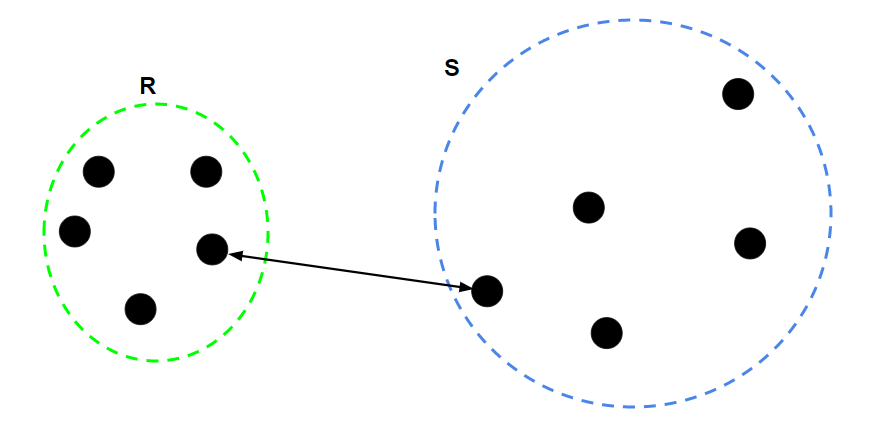

In [ ]:

plt.figure(figsize = (20,8))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### <font color=green>We clearly see, single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

## <font color=purple>Complete Linkage

**Complete Linkage<br>**

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points. 
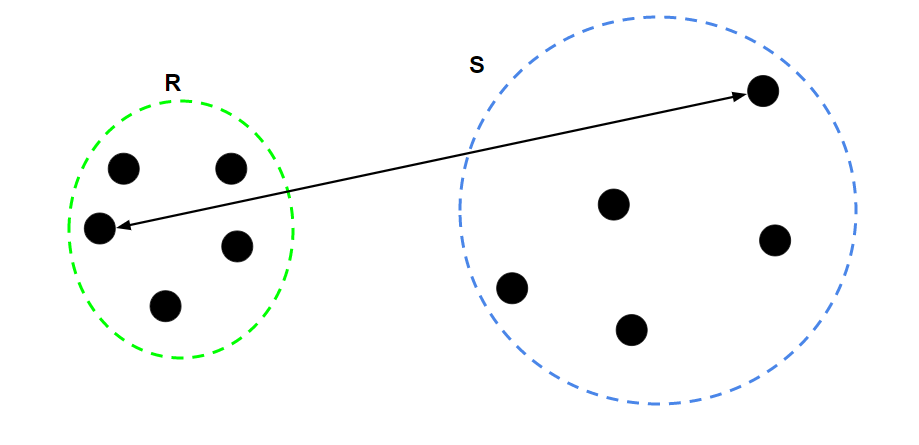

In [ ]:
# complete linkage
plt.figure(figsize = (20,8))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### <font color=green>Now we got the clear dendrogram and its easier to analyse the clusters. Lets consider a threshold value of 10. Draw the horizontal line at that height. It cuts 3 vertical lines, all of which represent a cluster.
### <font color=green>So we have 3 clusters now    

In [ ]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

In [ ]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

In [ ]:
df.cluster_labels.value_counts()

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='cluster_labels',data=df, palette='Set1')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_labels',data=df, palette='Set1')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels',data=df,palette='gist_rainbow')
plt.title('Clusters of income and GDP')
plt.show()

### <font color=green> We can see that the clusters formed are not great. Cluster 2 is having only one data point

In [ ]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='cluster_labels', y='child_mort', data=df,palette='rocket')
plt.title('Cluster labels vs child mortality',fontweight="bold", size=20)

plt.show()

### <font color=green>Cluster 0 is having high child mortality
### <font color=green>Cluster 1 and 2 have very low child mortality
         

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='cluster_labels', y='income', data=df, palette='cool')
plt.title('Cluster labels vs Income',fontweight="bold", size=20)

plt.show()


### <font color=green>Cluster 2 is having more income and cluster 1 has modertate income, cluster 0 has very least income

In [ ]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='cluster_labels', y='gdpp', data=df, palette='magma')
plt.title('Cluster labels vs GDP',fontweight="bold", size=20)

plt.show()


### <font color=green>Cluster 0 have very low GDP, cluster 2 have high GDP and cluster 1 has moderte GDP

 ### <font color=darkpink> From cluster profiling using hierarchical clustering we can see that :
- ### <font color=green>1. Cluster 0 is having the High child mortality, low GDP and very Low child mortality 
- ### <font color=green>2. Cluster 1 is having  Low child mortality, moderate income and GDP
- ### <font color=green>3. Cluster 2 is having very low child mortality,high income and GDP

- ### <font color=purple> We saw in cluster profiling that cluster 0 is having low income, low GDP and High Child Mortality
- ### <font color=purple> So we can say that countries under cluster 0 are in need of aid. Lets see the countries

In [ ]:
df[df['cluster_labels'] == 0].head()

In [ ]:
df1=df[df['cluster_labels'] == 0].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False,True, True])
df1.head(10)

In [ ]:
print("5 countries which are in direst need of aid based on hierarchical clustering" )
final_hier=df1[['country']].head()
hier= final_hier.reset_index(drop=True)
hier


- ### <font color=green> So from Hierarchical clustering, above are the five countries which are in direst need of aid

**We have analyzed both K-means and Hierarchical clustering and found clusters formed in both are not identical.
The clusters formed in Hierarchical clustering are not great.
So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.**

# <font color=purple>10. Final Analysis

### <font color=green>From K means clustering we got better clusters compared to Hierarchical clustering. 
### <font color=green> Cluster 2 is the better cluster we got with High child mortality, low income and low GDP    
### <font color=green>    Final list of country we got are:

In [ ]:
Kmean.head()

In [ ]:
Kmean=Kmean.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True])
Kmean.head()                                                                

In [ ]:
print('10 Countries based on high child mortality, low income and low GDP')
Kmean[['country']].head(10)

### <font color=purple>Lets choose countries based on socio economic and health factors

In [ ]:
Kmean.describe()

### <font color=green>For selected cluster Mean value of child mortality is 91.61. Lets choose the countries more than this mean value as we are looking at high child mortality rates

In [ ]:
df_final_list = Kmean[Kmean['child_mort']>91]
df_final_list.shape

In [ ]:
# Let's check the demographic of the resultant data again

df_final_list.describe()

### <font color=green>Now Mean value of income is 3639. Lets choose the countries less than this mean value.

In [ ]:
df_final_list1 = df_final_list[df_final_list['income']<3639]
df_final_list1.shape

In [ ]:
# Let's check the demographic of the resultant data again

df_final_list1.describe()

### <font color=green>Now Mean value of GDP is 698. Lets choose the countries less than this mean value.

In [ ]:
df_final_list2 = df_final_list1[df_final_list1['gdpp']<698]
df_final_list2.shape

In [ ]:
df_final_list2

## **Final List of countries which are in need of the aid based on socio-economic factors.**

In [ ]:
A_countries=df_final_list2['country']
A_countries=A_countries.reset_index(drop=True)
A_countries

## <font color=purple>Inferences

- #### <font color=green>From the EDA performed we could see that Income,  GDP and child Mortality are the major three variables need to be focused
- #### <font color=green>In K means clustering we got Cluster 2 is having very Low income, very Low GDP but High child mortality. So we concluded that countries under cluster 2 are in need of aid.
- #### <font color=green>In Hierarchical clustering we saw that Cluster 0 is having the High child mortality, low GDP and very Low child mortality. 
- #### <font color=green>The clusters formed in Hierarchical clustering were not that good. So we went on to consider cluster formed in K means clustering. And got top five countries with High child mortality,Low GDP and Low income
- #### <font color=green> Then we looked for the countries based on socio economic factors   

In [ ]:
print('Top 5 Countries based on K means clustering:')
Kmean[['country']].head()

In [ ]:
print('Countries based on socio economic and health factors:')
A_countries

## <font color=purple>Recommendations

- #### From the analysis performed, We can see that low income people have high child mortality, so CEO must focus more on low income countries
- #### We could also see Low GDP per capita countries are not having much import and export of goods and services. Those countries also must be focused
- #### There are some countries which spend well on health for the people living in that country. For ex: US. Such countries can be skipped. And focus more on Burundi, Congo, Dem. Rep where the total health spending is too less.
- #### If the total fertility is less the life expectency is more. Haiti is the country having very low life expectancy, and high child mortality. Its good to have less children per woman,so that they could be looked after well.
